In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d zaheenhamidani/ultimate-spotify-tracks-db
!unzip ultimate-spotify-tracks-db 

  0% 0.00/15.5M [00:00<?, ?B/s]
100% 15.5M/15.5M [00:00<00:00, 194MB/s]
Archive:  ultimate-spotify-tracks-db.zip
  inflating: SpotifyFeatures.csv     


In [ ]:
import numpy as np
import pandas as pd
import openpyxl as xl
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("SpotifyFeatures.csv")
data = df.copy()
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
df_corr = df.corr()
df_corr

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


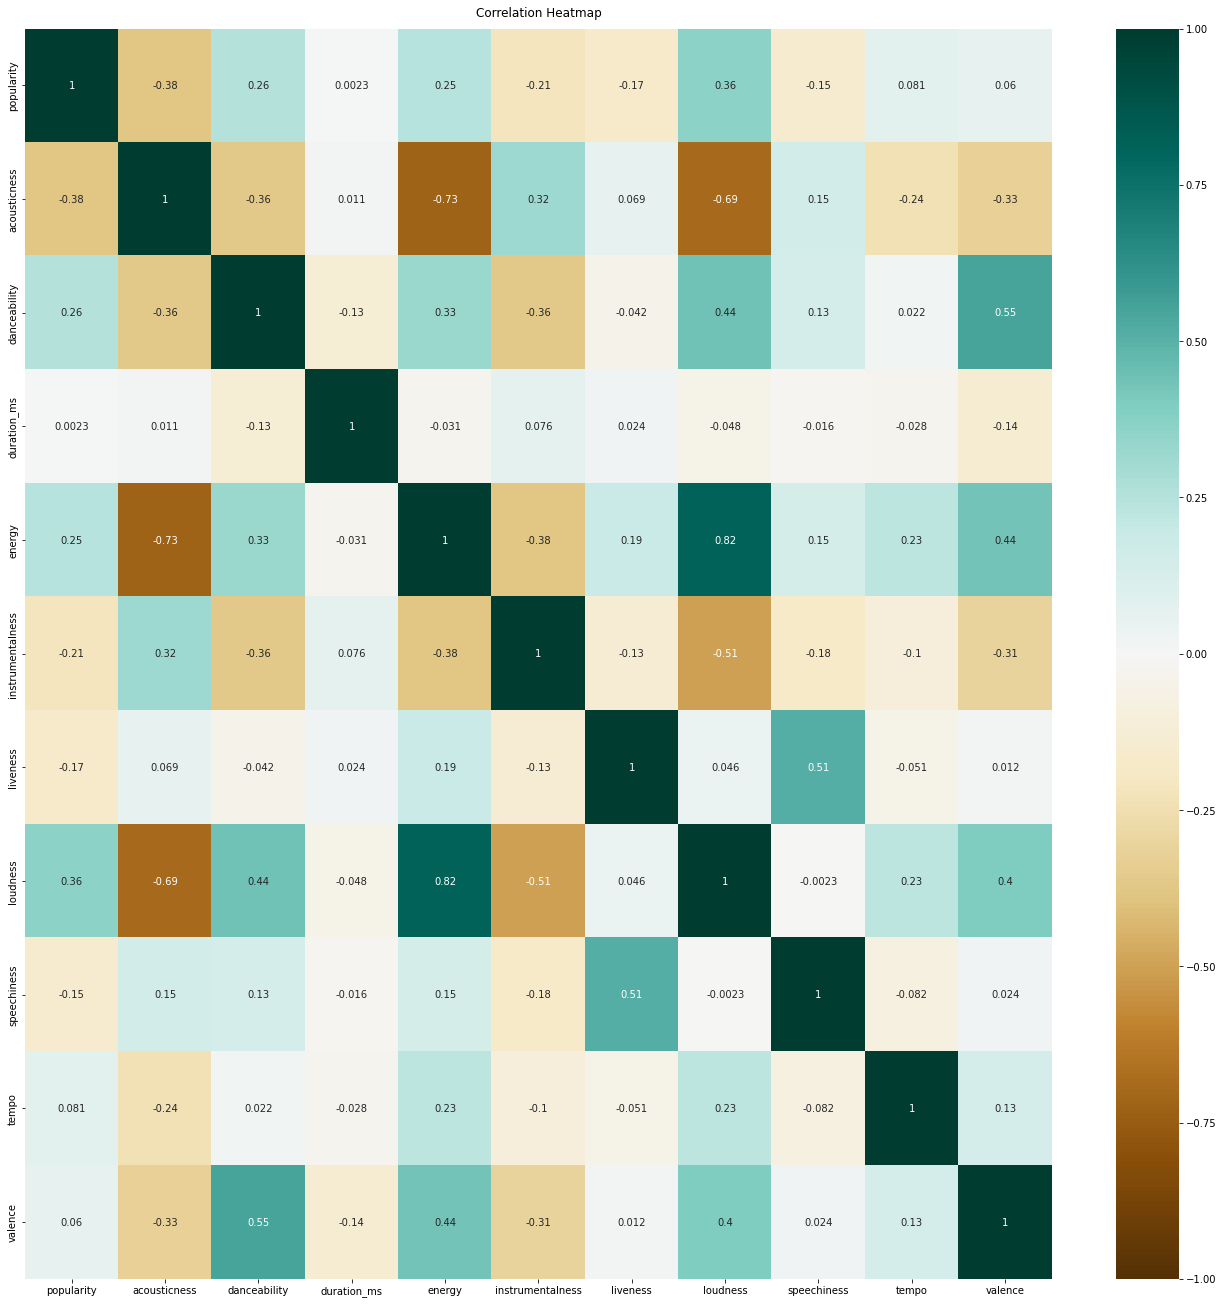

In [ ]:
plt.figure(figsize=(23, 23))
heatmap = sb.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', pad=12);

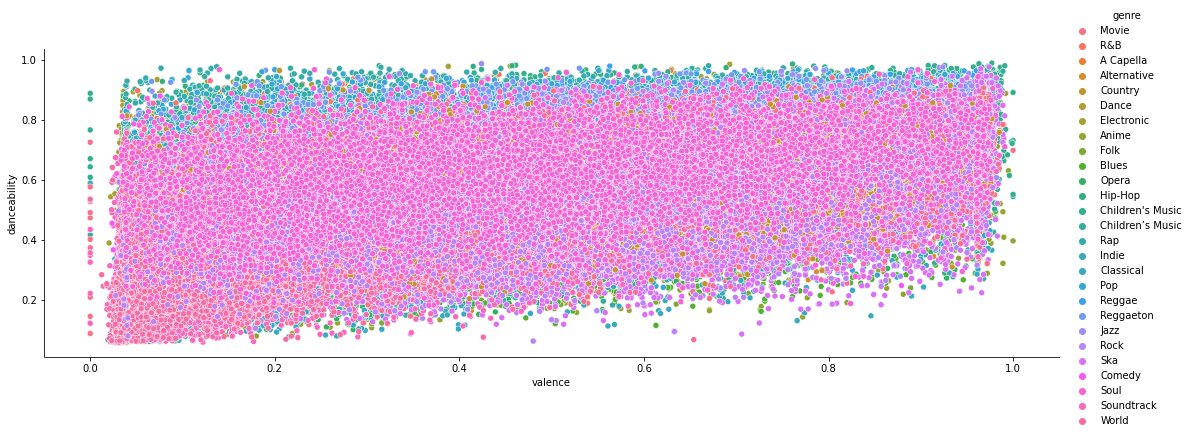

In [ ]:
sb.relplot(x="valence",y="danceability",data=df, hue="genre", height=5, aspect=3)

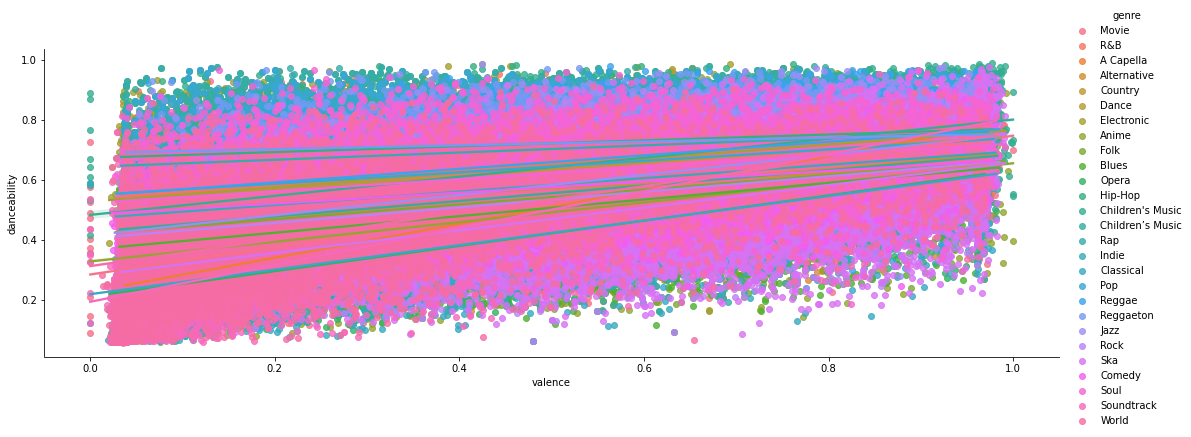

In [ ]:
sb.lmplot(x="valence",y="danceability",data=df, hue="genre", height=5, aspect=3 )

In [ ]:
df.groupby('genre').count()[0]

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
A Capella,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
Alternative,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263
Anime,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936
Blues,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023
Children's Music,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403
Children’s Music,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353
Classical,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256
Comedy,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681
Country,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664


In [ ]:
df2 = df.groupby('genre').mean().reset_index()
df2

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,A Capella,9.302521,0.829941,0.412252,204467.697479,0.250313,0.007491,0.136924,-13.660387,0.042414,111.518950,0.328724
1,Alternative,50.213430,0.162313,0.541898,233241.364245,0.711519,0.061303,0.196985,-6.540803,0.088783,122.534485,0.449590
2,Anime,24.258729,0.286843,0.472090,229937.067927,0.665356,0.280592,0.192391,-7.917802,0.065102,126.629156,0.441682
3,Blues,34.742879,0.327840,0.528232,251931.826000,0.606171,0.095175,0.233125,-9.053807,0.061809,121.137637,0.579425
4,Children's Music,4.252637,0.591781,0.697475,142726.774200,0.396880,0.143572,0.164894,-11.641760,0.117279,121.131288,0.675956
5,Children’s Music,54.659040,0.163175,0.541843,232554.443601,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
6,Classical,29.282195,0.868843,0.305958,310339.983578,0.177984,0.599425,0.162810,-21.544477,0.052001,104.341807,0.214463
7,Comedy,21.342630,0.793098,0.559038,235305.210102,0.676094,0.000574,0.724775,-11.689321,0.853532,98.235488,0.412764
8,Country,46.100416,0.270172,0.577038,217237.527008,0.636318,0.005610,0.187216,-7.341693,0.048989,123.414419,0.535160
9,Dance,57.275256,0.152888,0.638191,226264.941846,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754


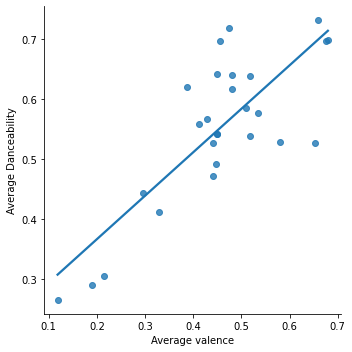

In [ ]:
p = sb.lmplot(x="valence",y="danceability",data=df2, ci=None)
p.set( xlabel="Average valence", ylabel="Average Danceability")

Text(0.5, 1.0, 'Popularity Based on Time Signature')

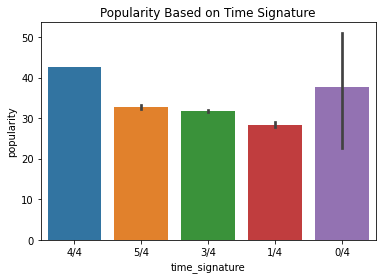

In [ ]:
sb.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularity Based on Time Signature')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

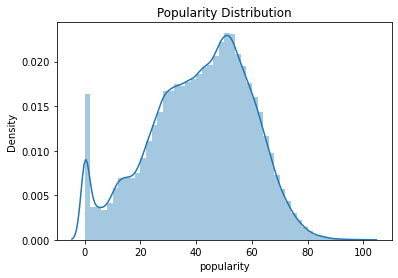

In [ ]:
sb.distplot(df['popularity']).set_title('Popularity Distribution')

Text(0.5, 1.0, 'Popularity Based on Mode')

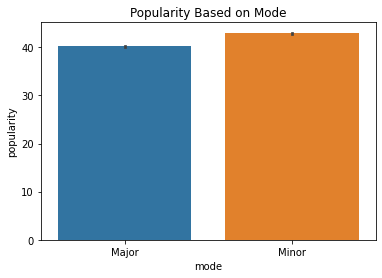

In [ ]:
sb.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity Based on Mode')

In [ ]:
genre_popularity = df[['genre','track_id', 'popularity']]
genre_count = df.groupby('genre')[['popularity']].count().sort_values(by='popularity', ascending=True)
genre_sum = df.groupby('genre')[['popularity']].sum().sort_values(by='popularity', ascending=True)

genre_rank = genre_sum.popularity / genre_count.popularity
genre_rank = genre_rank.sort_values(ascending=True)
genre_rank = pd.DataFrame(genre_rank).reset_index()

print(genre_rank)

               genre  popularity
0   Children's Music    4.252637
1          A Capella    9.302521
2              Movie   12.174097
3              Opera   13.335628
4             Comedy   21.342630
5              Anime   24.258729
6                Ska   28.612351
7          Classical   29.282195
8         Soundtrack   33.954800
9              Blues   34.742879
10             World   35.524077
11            Reggae   35.589328
12         Reggaeton   37.742915
13        Electronic   38.056095
14              Jazz   40.824383
15           Country   46.100416
16              Soul   47.027836
17              Folk   49.940209
18       Alternative   50.213430
19               R&B   52.308719
20  Children’s Music   54.659040
21             Indie   54.701561
22             Dance   57.275256
23           Hip-Hop   58.423131
24              Rock   59.619392
25               Rap   60.533795
26               Pop   66.590667


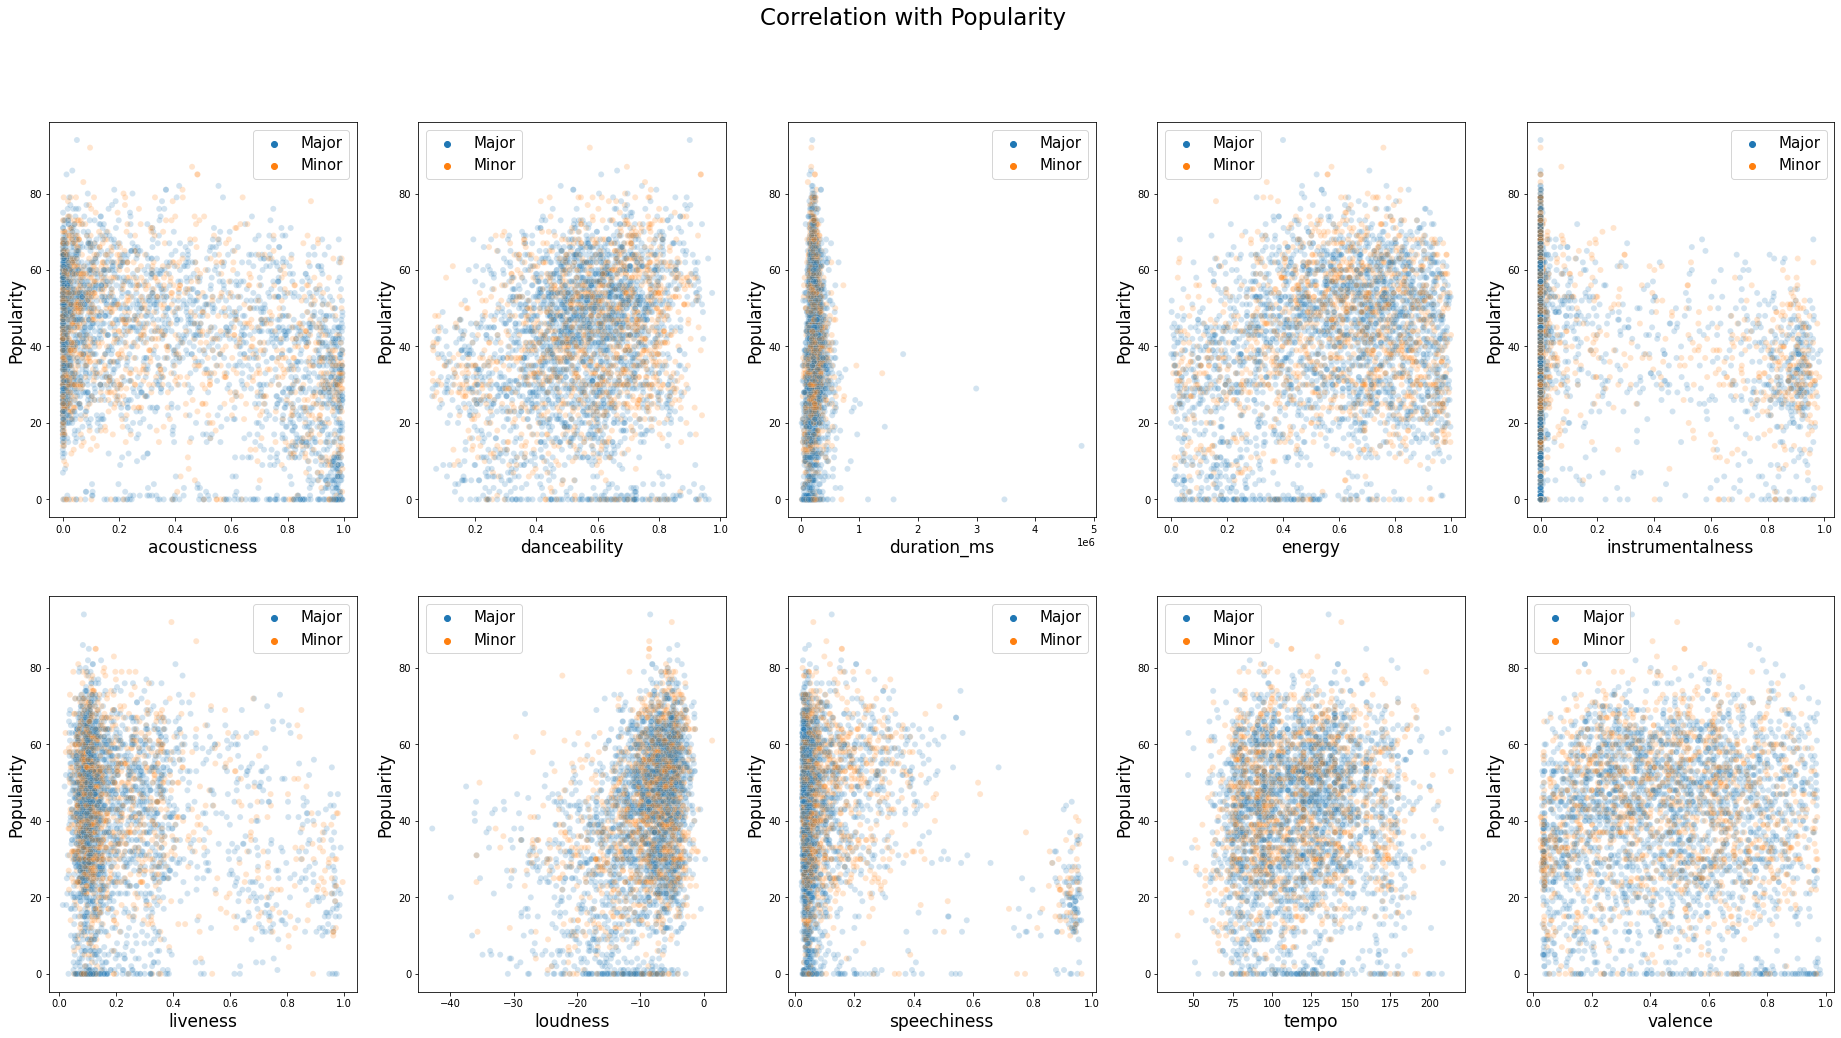

In [ ]:
df_sub2 = df.sample(int(0.017*len(df)))

plt.figure(figsize=(32,16))
num1 = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness", "speechiness", "tempo", "valence"]:
    if num1<=10:
        ax = plt.subplot(2,5, num1)
        sb.scatterplot(x =col, y="popularity", data=df_sub2, hue='mode', legend = "full", alpha=0.2)
        plt.xlabel(col,fontsize = 17)
        plt.ylabel("Popularity",fontsize = 17)
        plt.legend(fontsize = 15)
    num1 +=1
plt.suptitle("Correlation with Popularity",fontsize = 23)
plt.show()


In [ ]:
sb.pairplot(df)

In [ ]:
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
179224,Jazz,Jonathan Butler,Sarah Sarah,6fhmyImB6lgA7OXILJECmH,28,0.16900,0.623,304733,0.331,0.000001,3,0.1970,-13.690,Major,0.0635,179.870,4/4,0.676
37146,Electronic,Tropkillaz,Hotdamn!,7nM0z3D2eMBtpGmpqw8PqU,36,0.00544,0.664,184434,0.893,0.000193,0,0.1310,-4.501,Major,0.2010,189.988,4/4,0.401
2401,Country,T.G. Sheppard,Only One You,36V6Cb9DjnxlVNqqgD5piw,41,0.49000,0.813,202227,0.620,0.186000,5,0.0636,-12.454,Minor,0.0274,95.274,4/4,0.970
69544,Hip-Hop,August Alsina,I Luv This Shit,4IeUAegXVbETb7FpgNDnSM,62,0.00480,0.633,267920,0.584,0.000001,7,0.2220,-6.681,Minor,0.2570,124.069,4/4,0.354
158586,Reggaeton,Ozuna,Oye Cómo Va,6zORPez4xeKyhWs5kTTt57,47,0.31000,0.927,200360,0.636,0.000001,5,0.0363,-5.136,Minor,0.0416,126.036,4/4,0.718


In [ ]:
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
222946,Rock,John Michael Montgomery,Letters From Home,15cGdiAHmezm0P04jVAjMo,63,0.36700,0.644,267533,0.626,0.000006,2,0.1550,-7.243,1,0.0258,128.029,4/4,0.388
36611,Electronic,The Acid,Creeper,6haVbE5jacHBHAkISBGxFb,25,0.00734,0.700,206213,0.303,0.900000,5,0.1110,-11.868,0,0.1200,117.936,4/4,0.229
169514,Comedy,Katt Williams,16 New Super-Earths,49YFPKHahUtdjR6KnnbZLL,25,0.84700,0.490,129000,0.973,0.000000,4,0.9310,-7.137,1,0.6600,108.882,3/4,0.049
181305,Jazz,John Coltrane,"My Favorite Things, Pt. 1 - Single Version",71PIBY7M98pNGZQkl18ULu,34,0.32900,0.296,167000,0.257,0.000037,5,0.0925,-13.959,1,0.0312,164.400,3/4,0.260
185252,Ska,Against Me!,Joy,7loihWvB8oMGYr3OIVu11B,29,0.32400,0.724,132693,0.347,0.000217,0,0.1200,-8.087,1,0.0443,110.678,4/4,0.175


In [ ]:
list_of_time_signatures = df['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
6311,Alternative,Silverchair,Straight Lines,3gHeBUfAPPUxAJoQ8lsjt2,49,0.0340,0.538,257733,0.656,0.001550,0,0.1090,-6.172,1,0.0287,127.500,0,0.165
114629,Rap,50 Cent,Just A Lil Bit,4nva9EpKntUTs6CRSGBCn9,74,0.0322,0.489,237707,0.692,0.006080,0,0.3150,-6.672,1,0.4100,96.946,0,0.527
132306,Reggae,Sizzla,(Dry Cry) Just One of Those Days,6QxfEP6lLniP5LxS2y1HNu,39,0.0586,0.703,208600,0.574,0.000000,2,0.0519,-5.710,1,0.1710,147.829,0,0.579
196042,Movie,Chorus,Super Super,57UkBcRGiEC75LjKZXqCKv,0,0.5110,0.774,265953,0.539,0.000011,11,0.0996,-10.081,0,0.1950,107.707,0,0.690
17190,Dance,LMFAO,Yes,0Rdfu7NQubmGmYz90usRCU,57,0.0706,0.733,183693,0.874,0.000000,4,0.2540,-3.238,0,0.0457,128.061,0,0.899


In [ ]:
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
135,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.08300,0.724,246333,0.689,0.000000,8,0.3040,-5.922,0,0.1350,146.496,0,0.6930
136,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,1,0.32300,0.685,186467,0.610,0.000000,2,0.1020,-5.221,0,0.0439,94.384,2,0.3230
137,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,1,0.06750,0.762,199520,0.520,0.000004,3,0.1140,-5.237,0,0.0959,75.047,0,0.0862
138,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,1,0.36000,0.563,240597,0.366,0.002430,11,0.0955,-6.896,0,0.1210,85.352,0,0.7680
139,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,1,0.59600,0.653,213947,0.621,0.000000,11,0.0811,-5.721,0,0.0409,100.006,0,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230312,Soul,James Brown,Get Up (I Feel Like Being A) Sex Machine - Pts...,6hpmTwgNCz81H2bFEREx29,1,0.27300,0.833,318800,0.661,0.000149,9,0.2940,-7.595,0,0.1010,108.314,0,0.8580
230782,Soul,Alex Hepburn,If You Stay,4sJoIeb8zWYCLHSLM0az3b,1,0.04530,0.719,194554,0.702,0.000013,11,0.0662,-4.577,1,0.0357,116.938,0,0.6130
230817,Soul,Paloma Faith,Make Your Own Kind of Music,5jsFFhABp2FkasGr4QcQd6,1,0.00862,0.567,163840,0.753,0.001830,5,0.1270,-4.823,1,0.0406,120.098,0,0.5660
230946,Soul,James Brown,Papa's Got A Brand New Bag - Pt. 1,5aZzmPUv5a2nna9sxBrmpL,1,0.51900,0.775,128973,0.725,0.054100,5,0.0944,-8.369,1,0.0944,129.681,0,0.9140


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [ ]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "mode", "speechiness", "tempo", "time_signature", "valence"]

In [ ]:
training = df.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = df.drop(training.index)[features]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [ ]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))



Accuracy: 0.7895316360511333


In [ ]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))


Accuracy: 0.9210441508217854


In [ ]:
NB_Model = GaussianNB()
NB_Model.fit(X_train, y_train)
NB_Predict = NB_Model.predict(X_valid)
NB_Accuracy = accuracy_score(y_valid, NB_Predict)
print("Accuracy: " + str(NB_Accuracy))

Accuracy: 0.7895316360511333


In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.7735524760983994


In [ ]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))


Accuracy: 0.852078633580406


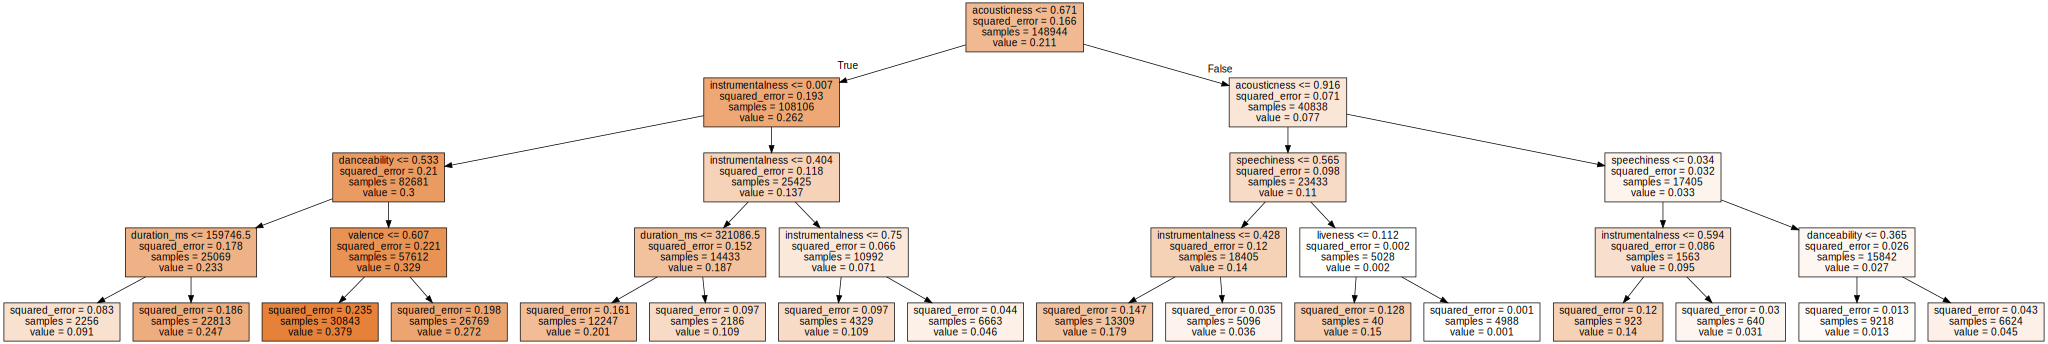

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

regr = DecisionTreeRegressor(max_depth=4, random_state=1234)
model = regr.fit(X_train, y_train)

dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=features,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np


def getStacking(k):
    l1 = []
    l1.append(('knn', KNN_Model))
    l1.append(('nb', NB_Model))
    l1.append(('rfc', RFC_Model))
    l1.append(('dt', DT_Model))
    
    l2 = LogisticRegression()
    model = StackingClassifier(estimators=l1, final_estimator=l2, cv=k)
    return model

def getModels():
    models = {}
    models['knn'] = KNN_Model
    models['nb'] = NB_Model
    models['rfc'] = RFC_Model
    models['dt'] = DT_Model
    return models

def evaluateModel(model, X, y, k):
    cv = KFold(n_splits=k, random_state=1, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


In [ ]:
from numpy import std
models = getModels()
k=7
for name, model in models.items():
    scores = evaluateModel(model, X_valid, y_valid, k)
    print(*scores, sep="\n")
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), std(scores)))
    print()

model_stacking = getStacking(k)
stacking_scores = evaluateModel(model_stacking, X_valid, y_valid, k)
print(*stacking_scores, sep="\n")
print('>%s %.3f (%.3f)' % ("stacking", np.mean(stacking_scores), std(stacking_scores)))


0.7556390977443609
0.7571428571428571
0.7546992481203008
0.7492009776273736
0.7527730776461741
0.7587892460988908
0.7505170144764053
>knn 0.754 (0.003)

0.78703007518797
0.7941729323308271
0.7879699248120301
0.7916901673246851
0.7911261515322429
0.7852979883436736
0.7894341041549163
>nb 0.790 (0.003)

0.8332706766917293
0.8342105263157895
0.831390977443609
0.8319232938522279
0.8319232938522279
0.8338033464937018
0.830607257003196
>rfc 0.832 (0.001)

0.7518796992481203
0.7432330827067669
0.7524436090225564
0.7507050197405527
0.7535250987027636
0.7525850723820267
0.7439368302312465
>dt 0.750 (0.004)

0.8293233082706767
0.8349624060150376
0.8263157894736842
0.8279751833051325
0.8298552359466065
0.8302312464749013
0.827223162248543
>stacking 0.829 (0.003)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance


In [ ]:
data = data.drop(["track_id","key","mode","time_signature"],1)
df = data.copy()
df = df.drop(["artist_name","track_name"],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
col = ['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence']
scaler = StandardScaler()
df[col] = scaler.fit_transform(df[col])

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
enc = pd.DataFrame(encoder.fit_transform(np.array(df["genre"]).reshape(-1,1)))
enc.columns = df["genre"].unique()

In [ ]:
df[enc.columns] = enc
df = df.drop("genre",1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
0,-2.261007,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.206031,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.096080,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.261007,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.041104,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df["name"] = data["track_name"]
df["artist"] = data["artist_name"]

df_2 = df.drop(["artist","name"],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
def sim_track_find(word,artist):
    a = 0
    b = 0
    song = []
    indexes = []
    for i in data["track_name"]:
        if word.lower() in i.lower() and artist.lower() in data["artist_name"][a].lower():
            song.append(df_2[a:a+1].values)
            indexes.append(a)
            b+=1
        a+=1
    if b == 0:
        print("Nothing found. Please try something else :)")
        return 0
        
    return song[0][0], indexes[0]

In [ ]:
def similar_tracks(data,number,song = "",artist = ""):

    if (sim_track_find(song,artist) == 0):
        return 0
    else:
        x=sim_track_find(song,artist)[0]
        index = sim_track_find(song,artist)[1]
    p = []
    count=0
    for i in df_2.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    song_names = df["name"]
    artist_names = df["artist"]

    print("\nSimilar songs to ",song_names[index]," by ", artist_names[index],"\n")
    for i in range(1,number+1):
        print(i,"- ",song_names[p[i][1]],", ",artist_names[p[i][1]])


In [ ]:
song = "ocean eyes"
artist = "billie"
num = 5

similar_tracks(df,int(num),song,artist)



Similar songs to  ocean eyes  by  Billie Eilish 

1 -  Abrázame Muy Fuerte ,  Juan Gabriel
2 -  I Can't Fall in Love Without You ,  Zara Larsson
3 -  idontwannabeyouanymore ,  Billie Eilish
4 -  Make It To Me ,  Sam Smith
5 -  Let It Go ,  James Bay
